## The ninth Lab-assignment (04/14/2022, 50 points in total)

The purpose of this assignment is to practice different Hypothesis Testing.

### Question 1 (15 points) 

During the 1980s, the general consensus is that about 5% of the nation’s children had autism. Some claimed that increases certain chemicals in the environment has led to an increase in autism. 

(1) Write an appropriate hypothesis test for this situation (5 points).  

(2) Give an appropriate test for this hypothesis, stating what are the necessary conditions for performing the test (5 points). 

(3) A recent study examined 384 children and found that 46 showed signs of autism. Perform a test of the hypothesis and state the p-value (5 points). 

In [3]:
# You answer here
'''
H0: 5% of nations children had autism
HA: 5% of nations children doesn't has autism

Appropriate hypothesis testing for this one is one sample z-test for propotion
#Alpha = 0.05%
'''



SyntaxError: invalid syntax (3564591253.py, line 10)

In [4]:
pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 20.9 MB/s eta 0:00:00
     ------------------------------------- 233.7/233.7 KB 14.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\lalit\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [7]:
# your code here
from statsmodels.stats.proportion import proportions_ztest
p0=0.05
n=384
x=46

proportions_ztest(count=5, nobs=n, value=0.46)

'''Since the p value is 0.0 which is less than alpha value, null hypothesis is rejected'''

(-77.2644132497523, 0.0)

### Question 2 (15 points) 

National data in the 1960s showed that about 44% of the adult population had never smoked. 

(1) State a null and alternative hypothesis to test that the fraction of the 1995 population of adults that had never smoked had increased (5 points).  

(2) A national random sample of 891 adults were interviewed and 463 stated that they had never smoked. Perform a z-test of the hypothesis and give an approriate p-value (5 points). 

(3) Create a 98% confidence interval for the proportion of adults who had never been smokers (5 points). 

In [ ]:
# You answer here
'''
H0: The population of adults that had never smoked had increased
Ha: The population of adults that had never smoked had decreased
'''

In [8]:
# your code here
proportions_ztest(count=44, nobs=891, value=4.63)

(-631.062712892761, 0.0)

In [9]:
import scipy.stats as st

st.t.interval(alpha=0.95, df=890,
              loc=44,
              scale=4.63)

(34.91300909530795, 53.08699090469205)

### Question 3 (15 points) 
In this problem,we will examine the sugar content of several national brands of cereals, here measured as a percentage of weight.

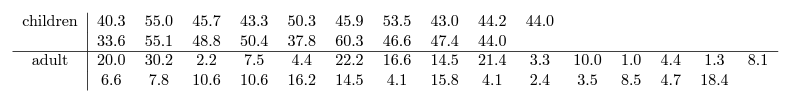

(1) Give a summary of these two datasets (5 points). 

(2) Create side-by-side boxplots and interpret what you see (5 points). 

(3) Use python to create a 95% confidence interval for the difference in mean sugar content and explain your result (5 points). 

In [12]:
# You answer here
import numpy as np

# sample data
children = [40.3, 55.0, 45.7, 43.3, 50.3, 45.9, 53.5, 43.0, 44.2, 44.0, 33.6, 55.1, 48.8,
            50.4, 37.8, 60.3, 46.6, 47.4, 44.0]

adult = [20.0, 30.2, 2.2, 7.5, 4.4, 22.2, 16.6, 14.5, 21.4, 3.3, 10.0, 1.0, 4.4, 1.3, 8.1, 6.6, 7.8, 10.6, 16.2, 14.5,
        4.1, 15.8, 4.1, 2.4, 3.5, 8.5, 4.7, 18.4]

print("Mean of sugar percent in cereals brands of children", np.mean(children))
print("Std.Deviation of sugar percent in cereals brands of children", np.std(children))
print()
print("Mean of sugar percent in cereals brands of adult", np.mean(adult))
print("Std.Deviation of sugar percent in cereals brands of adult", np.std(adult))

Mean of sugar percent in cereals brands of children 46.800000000000004
Std.Deviation of sugar percent in cereals brands of children 6.24718884147523

Mean of sugar percent in cereals brands of adult 10.153571428571427
Std.Deviation of sugar percent in cereals brands of adult 7.475220118252474


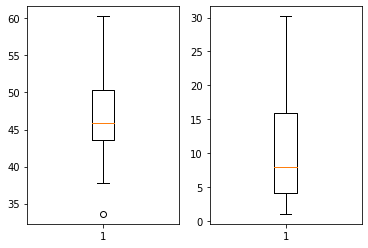

In [13]:
# your code here
import matplotlib.pyplot as plt
import numpy as np
plt.subplot(1, 2, 1)
# Creating box plot
plt.boxplot(children)


plt.subplot(1, 2, 2)
# Creating box plot
plt.boxplot(adult)
 
# show plot
plt.show()

In [14]:
st.t.interval(alpha=0.95,
              df=len(children)-1,
              loc=np.mean(children), 
              scale=st.sem(children))

st.t.interval(alpha=0.95,
              df=len(adult)-1,
              loc=np.mean(adult), 
              scale=st.sem(adult))

(7.201794131005471, 13.105348726137382)

### Question 4 (15 points, with 10 extra point included) A/B Testing

Punishment for crime has many [philosophical justifications](http://plato.stanford.edu/entries/punishment/#ThePun).  An important one is that fear of punishment may *deter* people from committing crimes.

In the United States, some jurisdictions execute people who are convicted of particularly serious crimes, such as murder.  This punishment is called the *death penalty* or *capital punishment*.  The death penalty is controversial, and deterrence has been one focal point of the debate.  There are other reasons to support or oppose the death penalty, but in this project we'll focus on deterrence.

The key question about deterrence is:

> Through our exploration, does instituting a death penalty for murder actually reduce the number of murders?

You might have a strong intuition in one direction, but the evidence turns out to be surprisingly complex.  Different sides have variously argued that the death penalty has no deterrent effect and that each execution prevents 8 murders, all using statistical arguments!  We'll try to come to our own conclusion.

#### The data

The main data source for this lab comes from a [paper](http://cjlf.org/deathpenalty/DezRubShepDeterFinal.pdf) by three researchers, Dezhbakhsh, Rubin, and Shepherd.  The dataset contains rates of various violent crimes for every year 1960-2003 (44 years) in every US state.  The researchers compiled the data from the FBI's Uniform Crime Reports.

Since crimes are committed by people, not states, we need to account for the number of people in each state when we're looking at state-level data.  Murder rates are calculated as follows:

$$\text{murder rate for state X in year Y} = \frac{\text{number of murders in state X in year Y}}{\text{population in state X in year Y}}*100000$$

(Murder is rare, so we multiply by 100,000 just to avoid dealing with tiny numbers.)

Murder rates vary over time, and different states exhibit different trends. The rates in some states change dramatically from year to year, while others are quite stable. Let's plot a couple, just to see the variety.

*Hint*: To create two lines, you will need create the table `ak_mn` with two columns of murder rates, in addition to a column of years. This table will have the following structure:

| Year | Murder rate in Alaska | Murder rate in Minnesota |
|------|-----------------------|--------------------------|
| 1960 | 10.2                  | 1.2                      |
| 1961 | 11.5                  | 1                        |
| 1962 | 4.5                   | 0.9                      |

<center>... (41 rows omitted)</center>

Some US states have the death penalty, and others don't, and laws have changed over time. In addition to changes in murder rates, we will also consider whether the death penalty was in force in each state and each year.

Using this information, we would like to investigate how the presence of the death penalty affects the murder rate of a state.

(1) Use preban_rates_copy and postban_rates to create a table change_in_death_rates that contains each state's population, murder rate, and whether or not that state had the death penalty for both 1971 and 1973. (5 points)

Create a table rate_means that contains the average murder rates for the states that had the death penalty and the states that didn't have the death penalty. It should have two columns: one indicating if the penalty was in place, and one that contains the average murder rate for each group.

Hint: tbl_1.append(tbl_2) with create a new table that includes rows from both tbl_1 and tbl_2. Both tables must have the exactly the same columns, in the same order.

(2) We want to figure out if there is a difference between the distribution of death rates in 1971 and 1973. Specifically, we want to test if murder rates were higher in 1973 than they were in 1971. You are required to conduct A/B Testing below (10 points):

(2-1) Set observed_difference to the observed test statistic using the rate_means table. 


(2-2) Given a table like change_in_death_rates, a value column label, and a group column group_label, write a function that calculates the appropriate test statistic.

(2-3) Write a function simulate_and_test_statistic to compute one trial of our A/B test. Your function should run a simulation and return a test statistic.

(2-4) Simulate 5000 trials of our A/B test and store the test statistics in an array called differences.

(2-5) Find the p-value for your test and assign it to empirical_P.

(2-6) Using a 5% P-value cutoff, draw a conclusion about the null and alternative hypotheses. Describe your findings using simple, non-technical language. What does your analysis tell you about murder rates after the death penalty was suspended? What can you claim about causation from your statistical analysis?


In [ ]:
# You answer here



In [15]:
# You code here

import pandas as pd

# load dataset
data = pd.read_csv("crime_rates.csv")

# creating table that as in above question
df = data[(data['State'] == 'Alaska')][['Year', 'Murder Rate']]

# we extract Minnesota data and load add to table
d = {}
for year in (list(set(list(data['Year'].values)))):
    if data[(data['Year'] == year) & (data['State'] == 'Minnesota')].shape[0] > 0:
        d[year] = data[(data['Year'] == year) & (data['State'] == 'Minnesota')]['Murder Rate'].values[0]
    else:
        d[year] = 0
        
len(d)

df['Murder rate in Minnesota'] = d.values()

df.columns = ['Year', 'Murder rate in Alaska', 'Murder rate in Minnesota']
df

,Year,Murder rate in Alaska,Murder rate in Minnesota
0,1960,10.2,1.2
1,1961,11.5,1.0
2,1962,4.5,0.9
3,1963,6.5,1.2
4,1964,10.4,1.4
5,1965,6.3,1.4
6,1966,12.9,2.2
7,1967,9.6,1.6
8,1968,10.5,2.2
9,1969,10.6,1.9


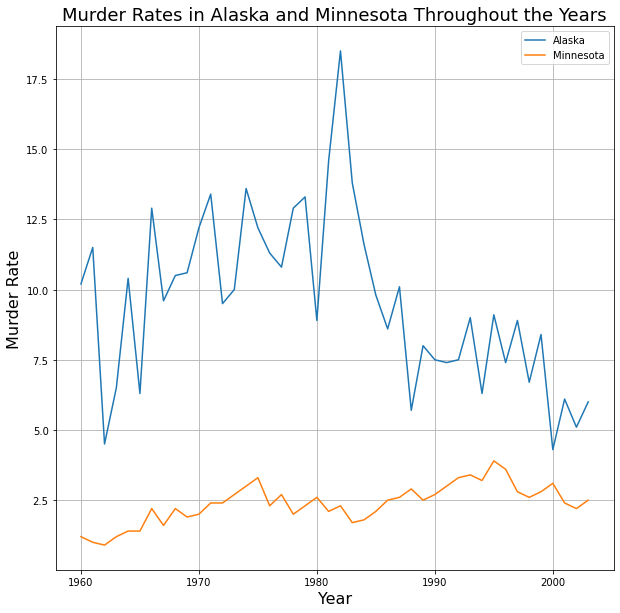

In [16]:
plt.figure(figsize=(10,10))
plt.title('Murder Rates in Alaska and Minnesota Throughout the Years',fontsize=18)
plt.plot(df['Year'],df['Murder rate in Alaska'],label='Alaska')
plt.plot(df['Year'],df['Murder rate in Minnesota'],label='Minnesota')
plt.xlabel('Year',fontsize=16)
plt.ylabel('Murder Rate',fontsize=16)
plt.legend()
plt.grid()
plt.show()